In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('./Training Data/BostonHousing.csv')

In [3]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

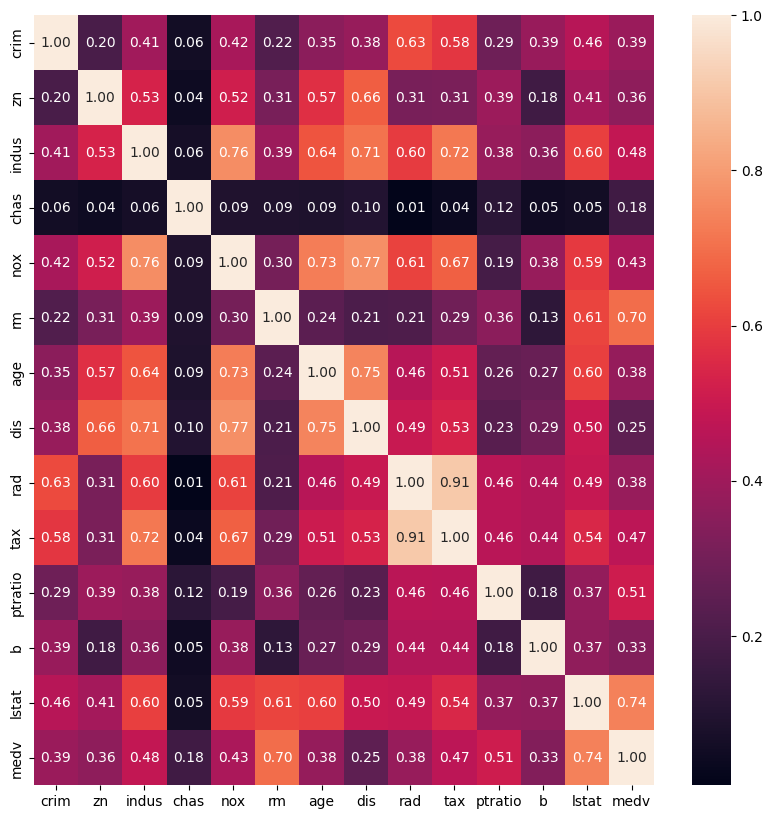

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(),annot=True,fmt='.2f')

In [95]:
X = data.drop(columns=['medv','age']).values
y = data['medv'].values

In [96]:
X.shape

(506, 12)

In [97]:
y.shape

(506,)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [104]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [105]:
ypred = clf.predict(x_test)

In [106]:
mse = np.mean((y_test - ypred)**2)
mse

24.1838076665495

In [107]:
clf.score(x_test,y_test)

0.6702228274016813

In [108]:
r2_score(y_train,clf.predict(x_train))

0.7507663164689184

In [109]:
r2_score(y_test,clf.predict(x_test))

0.6702228274016813